In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import sympy as sp

In [45]:
%matplotlib nbagg

In [46]:
mux, stdx = 0, 1
muy, stdy = 5, 2
fx = stats.norm(mux, stdx)
fy = stats.norm(muy, stdy)

In [47]:
def Z(X, Y):
    '''Rezerva spolehlivosti Z=Y+1-X**2'''
    return Y + 1 - X**2

def get_bound_y(x):
    '''Hranice poruchy Z=0'''
    return x**2 - 1

## Cornellův index spolehlivosti

In [48]:
mu_Z = muy + 1 - (mux**2 + stdx**2)
std_Z = np.sqrt(stdy**2 + 4 * mux**2 * stdx**2 + 2 * stdx**4)
beta = mu_Z / std_Z
rv = stats.norm(0, 1)
pf = rv.cdf(-beta)
print('mu_Z =', mu_Z)
print('std_Z =', std_Z)
print('beta =', beta)
print('pf =', pf)

mu_Z = 5
std_Z = 2.44948974278
beta = 2.04124145232
pf = 0.0206134166686


## Monte Carlo (MC)

In [96]:
def MC(nsim):
    x = fx.rvs(nsim) # realizace náhodné veličiny X
    y = fy.rvs(nsim) # realizace náhodné veličiny Y

    z = Z(x,y) # rezerva spolehlivosti

    fails = z < 0 # poruchy
    nf = np.sum(fails) # počet poruch
    pf = nf / float(nsim) # pravděpodobnost poruchy
    return x, y, z, nf, pf

In [97]:
nsim = 1000000 # počet simulací
x, y, z, nf, pf = MC(nsim)
print('pf =', pf)

pf = 0.030147


<IPython.core.display.Javascript object>


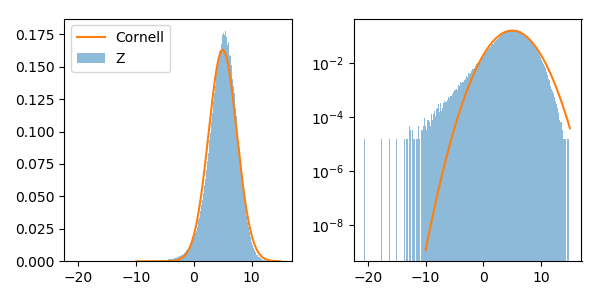

In [104]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(6,3),
                              tight_layout=True)

rv = stats.norm(mu_Z, std_Z)
x = np.linspace(-10, 15, 1000)

ax1.hist(z, bins='auto', normed='True', alpha=.5, label='Z')
ax1.plot(x, rv.pdf(x), label='Cornell')
ax1.legend()

ax2.hist(z, bins='auto', normed='True', alpha=.5, label='Z')
ax2.plot(x, rv.pdf(x), label='Cornell')
ax2.set_yscale('log')

In [105]:
nsim = 100 # počet simulací
x, y, z, nf, pf = MC(nsim)
print('pf =', pf)
print('počet poruch', nf)

pf = 0.05
počet poruch 5


<IPython.core.display.Javascript object>


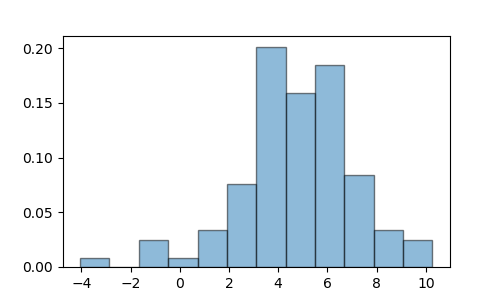

In [106]:
fig, ax = plt.subplots(figsize=(5,3))
ax.hist(z, bins='auto', normed='True', ec='k', alpha=.5);

<IPython.core.display.Javascript object>


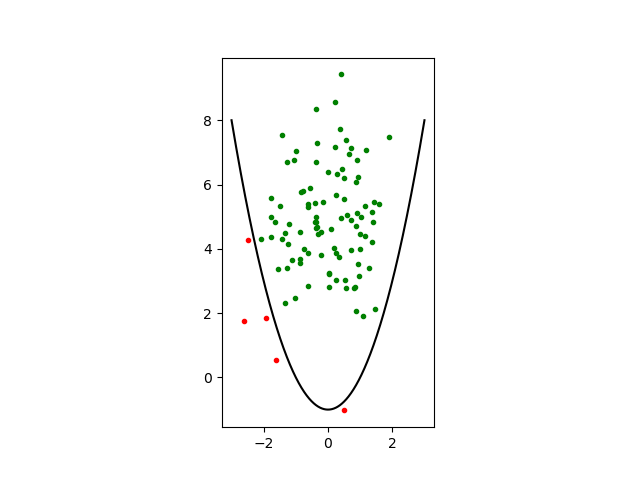

In [107]:
fig, ax = plt.subplots()
fails = z<0
ax.plot(x[~fails], y[~fails], 'g.')
ax.plot(x[fails], y[fails], 'r.')
bound_x = np.linspace(-3, 3, 1000)
ax.plot(bound_x, get_bound_y(bound_x), 'k-')
ax.set_aspect('equal')

## Importance Sampling (IS)

In [108]:
hx = stats.norm(mux, stdx * 2)
hy = stats.norm(muy, stdy * 2)

In [109]:
def IS(nsim):
    xi = hx.rvs(nsim) # realizace váhové funkce náhodné veličiny X
    yi = hy.rvs(nsim) # realizace váhové funkce náhodné veličiny Y

    zi = Z(xi,yi) # rezerva spolehlivosti

    failsi = zi < 0 # poruchy

    nfi = np.sum(failsi)
    weights = (fx.pdf(xi[failsi]) * fy.pdf(yi[failsi]) / (hx.pdf(xi[failsi]) * hy.pdf(yi[failsi]))) # opravné váhy poruch
    pfi = np.sum(weights)/float(nsim) # pravděpodobnost poruchy
    return xi, yi, zi, weights, nfi, pfi

In [110]:
xi, yi, zi, weights, nfi, pfi = IS(nsim)
print('pf =', pfi)
print(u'počet bodů v oblasti porchy', nfi)

pf = 0.0367728961074
počet bodů v oblasti porchy 38


<IPython.core.display.Javascript object>


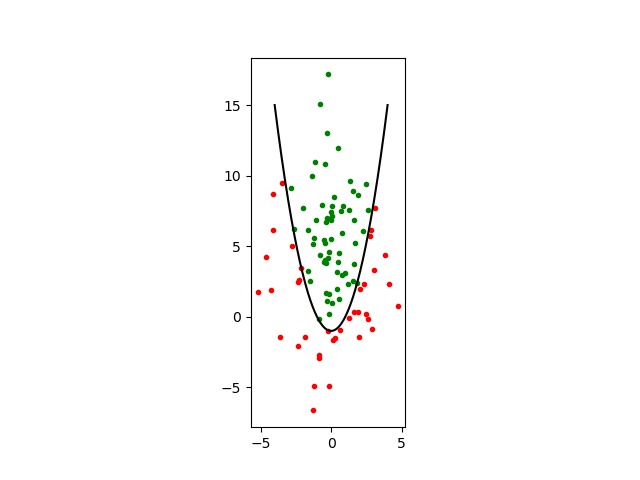

In [111]:
fig, ax = plt.subplots()
failsi = zi < 0
ax.plot(xi[~failsi], yi[~failsi], 'g.')
ax.plot(xi[failsi], yi[failsi], 'r.')
bound_x = np.linspace(-4, 4, 1000)
ax.plot(bound_x, get_bound_y(bound_x), 'k-')
ax.set_aspect('equal')

## Analýza chyby MC a IS

In [112]:
nsim = 100
nrun = 1000
pfs = []
for _ in range(nrun):
    x, y, z, nf, pf = MC(nsim)
    pfs.append(pf)
pfs_100 = np.array(pfs)
mu_pfs = pfs_100.mean(axis=0)
std_pfs = pfs_100.std(axis=0)
cov_pfs = std_pfs / mu_pfs
print('mu_pfs =', mu_pfs)
print('std_pfs =', std_pfs)
print('cov_pfs =', cov_pfs)

mu_pfs = 0.02916
std_pfs = 0.017213204234
cov_pfs = 0.590301928462


In [113]:
nsim = 1000
nrun = 1000
pfs = []
for _ in range(nrun):
    x, y, z, nf, pf = MC(nsim)
    pfs.append(pf)
pfs_1000 = np.array(pfs)
mu_pfs = pfs_1000.mean(axis=0)
std_pfs = pfs_1000.std(axis=0)
cov_pfs = std_pfs / mu_pfs
print('mu_pfs =', mu_pfs)
print('std_pfs =', std_pfs)
print('cov_pfs =', cov_pfs)

mu_pfs = 0.029896
std_pfs = 0.00526414133549
cov_pfs = 0.176081794738


<IPython.core.display.Javascript object>


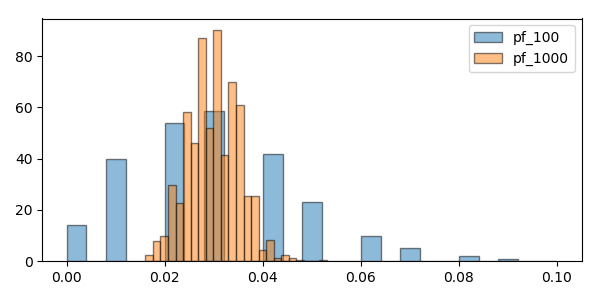

In [114]:
fig, ax = plt.subplots(figsize=(6,3), tight_layout=True)
ax.hist(pfs_100, normed=True, bins='auto',
        ec='k', alpha=.5, label='pf_100')
ax.hist(pfs_1000, normed=True, bins='auto',
        ec='k', alpha=.5, label='pf_1000')
ax.legend();

In [117]:
nsim = 100
nrun = 1000
pfs = []
for _ in range(nrun):
    x, y, z, weights, nf, pf = IS(nsim)
    pfs.append(pf)
pfs_100 = np.array(pfs)
mu_pfs = pfs_100.mean(axis=0)
std_pfs = pfs_100.std(axis=0)
cov_pfs = std_pfs / mu_pfs
print('mu_pfs =', mu_pfs)
print('std_pfs =', std_pfs)
print('cov_pfs =', cov_pfs)

mu_pfs = 0.0297737854391
std_pfs = 0.00871698594094
cov_pfs = 0.292773855


In [118]:
nsim = 1000
nrun = 1000
pfs = []
for _ in range(nrun):
    x, y, z, weights, nf, pf = IS(nsim)
    pfs.append(pf)
pfs_1000 = np.array(pfs)
mu_pfs = pfs_1000.mean(axis=0)
std_pfs = pfs_1000.std(axis=0)
cov_pfs = std_pfs / mu_pfs
print('mu_pfs =', mu_pfs)
print('std_pfs =', std_pfs)
print('cov_pfs =', cov_pfs)

mu_pfs = 0.0299977180383
std_pfs = 0.00267343451932
cov_pfs = 0.0891212630211


<IPython.core.display.Javascript object>


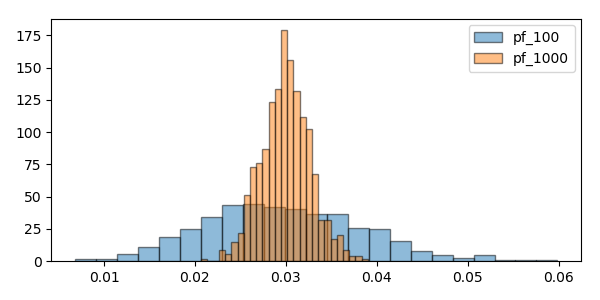

In [119]:
fig, ax = plt.subplots(figsize=(6,3), tight_layout=True)
ax.hist(pfs_100, normed=True, bins='auto',
        ec='k', alpha=.5, label='pf_100')
ax.hist(pfs_1000, normed=True, bins='auto',
        ec='k', alpha=.5, label='pf_1000')
ax.legend();

## Openturns

In [121]:
import openturns as ot

# dimension
dim = 2

# Analytical model definition:
limitState = ot.Function(['X', 'Y'], ['G'], ['Y + 1 - X*X'])

# Test of the limit state function:
x = [300., 75000.]
print('x=', x)
print('G(x)=', limitState(x))

x= [300.0, 75000.0]
G(x)= [-14999]


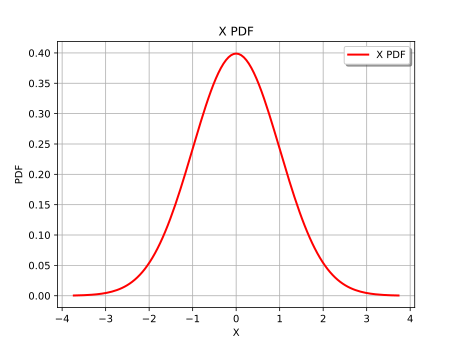

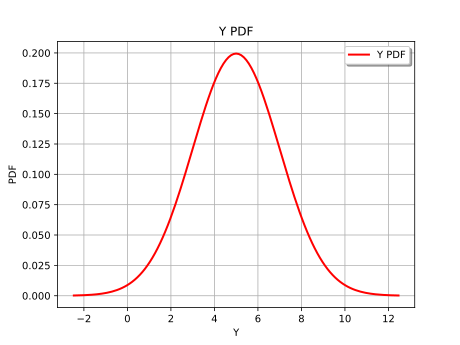

In [122]:
X_dist = ot.Normal(mux, stdx)
X_dist.setName('X')
X_dist.setDescription('X')
# Graphical output of the PDF
display(X_dist.drawPDF())

Y_dist = ot.Normal(muy, stdy)
Y_dist.setName('Y')
Y_dist.setDescription('Y')
# Graphical output of the PDF
Y_dist.drawPDF()

In [123]:
# Create a copula : IndependentCopula (no correlation)
aCopula = ot.IndependentCopula(dim)
aCopula.setName('Independent copula')

# Instanciate one distribution object
myDistribution = ot.ComposedDistribution([X_dist, Y_dist], aCopula)
myDistribution.setName('myDist')

# We create a 'usual' RandomVector from the Distribution
vect = ot.RandomVector(myDistribution)

# We create a composite random vector
G = ot.RandomVector(limitState, vect)

# We create an Event from this RandomVector
myEvent = ot.Event(G, ot.Less(), 0.0)

MonteCarlo result= probabilityEstimate=3.043137e-02 varianceEstimate=2.314141e-06 standard deviation=1.52e-03 coefficient of variation=5.00e-02 confidenceLength(0.95)=5.96e-03 outerSampling=12750 blockSize=1
Number of executed iterations = 12750
Number of calls to the limit state = 12750
Pf =  0.03043137254901959
CV = 0.04998888091445773


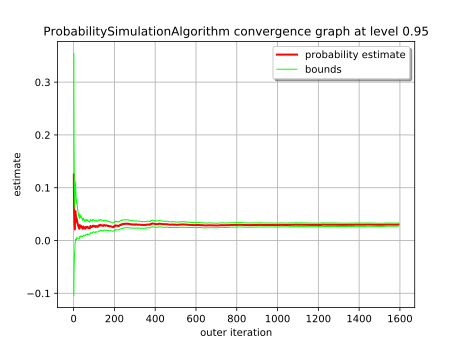

In [124]:
# Using Monte Carlo simulations
cv = 0.05
NbSim = 100000

experiment = ot.MonteCarloExperiment()
algoMC = ot.ProbabilitySimulationAlgorithm(myEvent, experiment)
algoMC.setMaximumOuterSampling(NbSim)
algoMC.setBlockSize(1)
algoMC.setMaximumCoefficientOfVariation(cv)
# For statistics about the algorithm
initialNumberOfCall = limitState.getEvaluationCallsNumber()

# Perform the analysis:
algoMC.run()

# Results:
result = algoMC.getResult()
probability = result.getProbabilityEstimate()
print('MonteCarlo result=', result)
print('Number of executed iterations =', result.getOuterSampling())
print('Number of calls to the limit state =', limitState.getEvaluationCallsNumber() - initialNumberOfCall)
print('Pf = ', probability)
print('CV =', result.getCoefficientOfVariation())
algoMC.drawProbabilityConvergence()

In [125]:
X_dist = ot.Normal(mux, stdx * 2)
X_dist.setName('X')
X_dist.setDescription('X')

Y_dist = ot.Normal(muy, stdy * 2)
Y_dist.setName('Y')
Y_dist.setDescription('Y')

myImportance = ot.ComposedDistribution([X_dist, Y_dist], aCopula)
experiment = ot.ImportanceSamplingExperiment(myImportance)
algo = ot.ProbabilitySimulationAlgorithm(ot.StandardEvent(myEvent), experiment)
algo.setMaximumCoefficientOfVariation(0.05)
algo.setMaximumOuterSampling(10000)
algo.setConvergenceStrategy(ot.Full())
algo.run()

# retrieve results
result = algo.getResult()
probability = result.getProbabilityEstimate()
print(result)
print('Pf=', probability)

probabilityEstimate=3.126162e-02 varianceEstimate=4.387389e-06 standard deviation=2.09e-03 coefficient of variation=6.70e-02 confidenceLength(0.95)=8.21e-03 outerSampling=10000 blockSize=1
Pf= 0.031261623545164395


In [126]:
# Define a solver
optimAlgo = ot.Cobyla()
optimAlgo.setMaximumIterationNumber(1000)
optimAlgo.setMaximumAbsoluteError(1.0e-10)
optimAlgo.setMaximumRelativeError(1.0e-10)
optimAlgo.setMaximumResidualError(1.0e-10)
optimAlgo.setMaximumConstraintError(1.0e-10)

In [131]:
# Run FORM
algo = ot.FORM(optimAlgo, myEvent, myDistribution.getMean())
algo.run()
result = algo.getResult()
standardSpaceDesignPoint = result.getStandardSpaceDesignPoint()
result.getGeneralisedReliabilityIndex()

2.2360679774774295

In [132]:
result.getHasoferReliabilityIndex()

2.236067977477429

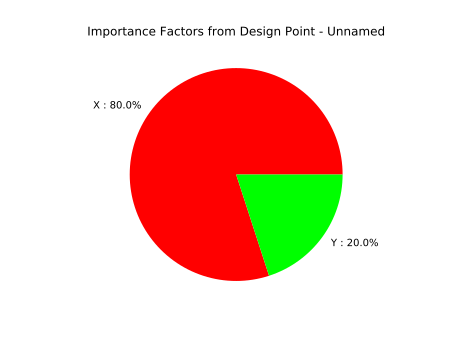

In [139]:
result.drawImportanceFactors()